In [1]:
from __future__ import (division, print_function, absolute_import)

In [2]:
%matplotlib inline
import math
import matplotlib.pyplot as plt 
import numpy as np
import healpy as hp
import pyfits as pf
import astropy as ap
import os
from scipy.special import eval_legendre  ##special scipy function


In [3]:
# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.io.readsav.html
# http://www.astrobetter.com/blog/2009/11/24/read-idl-save-files-into-python/

In [4]:
import scipy
import scipy.io

In [5]:
cd ~/Downloads

/Users/evanbiederstedt/Downloads


In [6]:
# In[8]:

patch_file = scipy.io.readsav('listpix_patch3.sav')


# In[ ]:




# In[9]:

type(patch_file)


# In[10]:

arr3 = patch_file['listpix_patch3']
#print(arr3)


# In[11]:

type(arr3)


# In[12]:

print(len(arr3)) # pixels total 12476


# In[13]:

smica_map = "COM_CompMap_CMB-smica_2048_R1.20.fits"


# In[ ]:




# In[14]:

nside=512
npix = 12*(nside**2) #total number of pixels, npix
LMAX = ((2*nside)) #maximum l of the power spectrum C_l
heal_npix = hp.nside2npix(nside) # Healpix calculated npix

print("The total number of pixels is " + str(npix))
print("The maximum ell of the power spectrum C_l set to lmax = 2*nside " +str(LMAX))
print("Healpix tells me total number of pixels npix is equal to " + str(heal_npix))


# In[15]:

mapread_smica = hp.read_map(smica_map, field=0)
#hp.mollview(mapread_camb512)
#hp.mollview(mapread_smica)
print("CMB map, Noise map")
smica_noise = hp.read_map(smica_map, field=1)
#hp.mollview(smica_noise)


# In[16]:

print(mapread_smica[:20])
print(smica_noise[:20])


# In[17]:

smica512 = hp.pixelfunc.ud_grade(mapread_smica, 512)
noise512 = hp.pixelfunc.ud_grade(smica_noise, 512)
print(smica512[:20])
print(noise512[:20])


# In[18]:

print(len(smica512))
print(len(noise512))


# In[ ]:




# In[19]:

# rename array for convenience
tempval = smica512

# Data:
#     tempval      # the array of pixel values, (3145728,)


# In[20]:

print(len(tempval))
print(tempval.shape)
tempval[:10]


# In[21]:

#
# We only wish to use the pixels defined in our patch
# These pixel indices are listed in arr3 such that total number pixels total 12476
#
# arr3: this defines pixel indices within patch
# 
# To access pixel indices within array of CMB pixels, just use tempval[arr3]
#
patch=smica512[arr3]
noisepatch = noise512[arr3]


# In[22]:

print(len(patch))
print(len(noisepatch))


# In[23]:

print(patch[:30])
print(noisepatch[:30])

768
The total number of pixels is 3145728
The maximum ell of the power spectrum C_l set to lmax = 2*nside 1024
Healpix tells me total number of pixels npix is equal to 3145728
NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING
CMB map, Noise map
NSIDE = 2048
ORDERING = NESTED in fits file
Ordering converted to RING
[-149.29827881 -110.67951965  -97.61709595 -163.04072571 -176.72653198
 -120.62650299  -96.60706329  -85.72504425  -45.77533722  -81.54304504
 -138.88243103 -190.0241394  -198.08218384 -160.84889221 -103.28009033
  -83.06707001  -81.32474518  -63.77209091  -14.57890129  -20.42744637]
[ -9.46955872 -18.9770813    4.07545471  -2.22019196   5.77149963
  -4.3202858  -32.39636993  -4.47360992  12.77639008  11.26256943
  13.93226242  -8.88911438  20.69018555  15.28821564   3.15649033
 -25.5931778  -23.94864082  12.71397209  22.85354424  -1.77952194]
[ -1.55347087e+02  -6.99120010e+01  -1.67105378e+01  -1.41747673e+02
  -1.48236466e+02  -7.43404467e+01  -6.92688

In [7]:
# For lmax = 1600, we must create an array of ell values, i.e. [0 1 2 3....1599 1600]
ell = np.arange(1601)
#print(ell)
# 
# Subtract the monopole and dipole, l=0, l=1
ellval = ell[2:]
#print(ellval)


In [8]:
PlM_50 = "cl_varyCDMlmax1600ptPlMat50.npy"
PlM_100 = "cl_varyCDMlmax1600ptPlMat100.npy"
PlM_150 = "cl_varyCDMlmax1600ptPlMat150.npy"

In [9]:
data1 = np.load(PlM_50)
data2 = np.load(PlM_100)
data3 = np.load(PlM_150)

In [10]:
print(data1.shape)
print(data2.shape)
print(data3.shape)

(550, 768, 768)
(549, 768, 768)
(500, 768, 768)


In [11]:
type(data1)

numpy.ndarray

In [12]:

ff = "CAMB_cl_varyCDMlmax1600.npy"

cell_array = np.load(ff)


In [13]:

PlMat_total = np.concatenate((data1, data2, data3))


In [14]:
PlMat_total.shape

(1599, 768, 768)

In [15]:
PlMat = PlMat_total

In [16]:
PlMat[2]

array([[ 1.        ,  0.99997988,  0.99997988, ...,  0.96158791,
         0.96036615,  0.95910766],
       [ 0.99997988,  1.        ,  0.99996458, ...,  0.96282875,
         0.96164559,  0.96042561],
       [ 0.99997988,  0.99996458,  1.        , ...,  0.96290159,
         0.96168201,  0.96042561],
       ..., 
       [ 0.96158791,  0.96282875,  0.96290159, ...,  1.        ,
         0.99998002,  0.99992007],
       [ 0.96036615,  0.96164559,  0.96168201, ...,  0.99998002,
         1.        ,  0.99998002],
       [ 0.95910766,  0.96042561,  0.96042561, ...,  0.99992007,
         0.99998002,  1.        ]])

In [17]:
# Step 3: (2*l +1)/4pi from l=2 to l=lmax
#          [5/4pi 7/4pi 9/4pi 11/4pi .... 65/4pi ]
norm = ((2*ellval + 1))/(4*math.pi)
print(len(ellval))
print(norm.shape)
print(norm[2])

1599
(1599,)
0.716197243914


In [18]:

# Step 4: multiply 
#         [5/4pi*P_2(M) + 7/4pi*P_3(M) +...... + 65/4pi*P_32(M)]
#
# multiply PlMat by (2*l+1)/4pi, i.e. norm
norm_matrix = norm[:, None, None] * PlMat
# [5/4pi * P_2(M)  7/4pi * P_3(M) ....   65/4pi * P_32(M)]

In [19]:
norm_matrix.shape

(1599, 768, 768)

In [20]:
PlMat.shape

(1599, 768, 768)

In [21]:
# Step 5: multiply by theoretical CAMB values, [C_2 C_3    C_31 C_32]
#         [5/4pi**C_2* P_2(M) + 7/4pi*C_3* P_3(M) +...... + 65/4pi*C_32* P_32(M)]



In [22]:
# define pixel-value arrays
mT = np.matrix(patch)     # mT.shape = (1, 3072)
m = np.matrix(patch).T    # m.shape = (3072, 1)
Npix2pi = (len(patch))*2*math.pi  # LF constant
print(mT.shape)
print(m.shape)
print(Npix2pi)

(1, 768)
(768, 1)
4825.48631591


In [23]:
#print(mT)

In [24]:
"""

tempp = (1e6)*patch # multiply CMB maps by 1e6

def LogLikehood_wNoise_1e12(param, sig):
    # param is our parameter, C_3
    Sij = param[:, None, None] * correctmatrix[None, :, :]
    newSij = (1e12)*Sij   # multiply S_ij by 1e12
    Nij = sig[:, None, None] * id_mat[None, :, :]
    newNij = (1e12)*Nij
    # Format 7/4pi * param * P_3(M) where param is the parameter we vary, C_l
    # Sij.shape = (20, 3072, 3072)
    Cij = newSij + newNij
    #invCij = np.linalg.inv(Cij)
    logdetC = np.linalg.slogdet(Cij)  # returns sign and determinant; use logdetC[1]
    # model_fit_terms = m^T C^-1 m
    #
    # model_fit_terms = np.array([np.dot(tempval.T , np.dot(invCij[i] , tempval) ) 
    # for i in range(invCij.shape[0])])
    #
    model_fit_terms = np.array([np.dot(tempp.T , np.linalg.solve(Cij[i], tempp) ) for i in range(Cij.shape[0]) ]) 
    return model_fit_terms + logdetC[1] + Npix2pi
"""

'\n\ntempp = (1e6)*patch # multiply CMB maps by 1e6\n\ndef LogLikehood_wNoise_1e12(param, sig):\n    # param is our parameter, C_3\n    Sij = param[:, None, None] * correctmatrix[None, :, :]\n    newSij = (1e12)*Sij   # multiply S_ij by 1e12\n    Nij = sig[:, None, None] * id_mat[None, :, :]\n    newNij = (1e12)*Nij\n    # Format 7/4pi * param * P_3(M) where param is the parameter we vary, C_l\n    # Sij.shape = (20, 3072, 3072)\n    Cij = newSij + newNij\n    #invCij = np.linalg.inv(Cij)\n    logdetC = np.linalg.slogdet(Cij)  # returns sign and determinant; use logdetC[1]\n    # model_fit_terms = m^T C^-1 m\n    #\n    # model_fit_terms = np.array([np.dot(tempval.T , np.dot(invCij[i] , tempval) ) \n    # for i in range(invCij.shape[0])])\n    #\n    model_fit_terms = np.array([np.dot(tempp.T , np.linalg.solve(Cij[i], tempp) ) for i in range(Cij.shape[0]) ]) \n    return model_fit_terms + logdetC[1] + Npix2pi\n'

In [25]:
# tempp = patch
# noise = 



In [26]:
tempp = patch
noise = noisepatch

cls0 = cell_array[0]

print(cls0)

[  1.60783694e-10   1.46076927e-10   1.34117628e-10 ...,   8.86319019e-11
   8.82252505e-11   8.78165488e-11]


In [27]:
tempp = patch
noise = noisepatch

# cell 0.075
cls0 = cell_array[0]
cell = cls0

In [28]:
# norm_matrix is (2*l+1)/4pi * P_ell(Mat)
CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
Sij =  np.sum(CellPellM, axis=0) # now one matrix

In [29]:
CellPellM.shape

(1599, 768, 768)

In [30]:
Sij.shape

(768, 768)

In [31]:
print(Sij)

[[  4.38215188e-05   1.67650687e-05   1.67650687e-05 ...,   1.60785519e-08
   -1.43081699e-08   2.57570491e-09]
 [  1.67650687e-05   4.38215188e-05   7.04409912e-06 ...,  -6.86003731e-09
    1.66273196e-08  -1.32954472e-08]
 [  1.67650687e-05   7.04409912e-06   4.38215188e-05 ...,  -9.02091048e-09
    1.68768776e-08  -1.32954472e-08]
 ..., 
 [  1.60785519e-08  -6.86003731e-09  -9.02091048e-09 ...,   4.38215188e-05
    1.68862302e-05   7.37147700e-07]
 [ -1.43081699e-08   1.66273196e-08   1.68768776e-08 ...,   1.68862302e-05
    4.38215188e-05   1.68869169e-05]
 [  2.57570491e-09  -1.32954472e-08  -1.32954472e-08 ...,   7.37147700e-07
    1.68869169e-05   4.38215188e-05]]


In [32]:
len(noise)

768

In [33]:
len(tempp)

768

In [34]:
id_matrix = np.identity(len(tempp))
print(id_matrix.shape)

(768, 768)


In [35]:
Nij = noise * id_matrix

In [36]:
Nij.shape

(768, 768)

In [37]:
print(Nij)

[[-8.99367619  0.         -0.         ..., -0.          0.         -0.        ]
 [-0.          0.28109169 -0.         ..., -0.          0.         -0.        ]
 [-0.          0.         -2.96515441 ..., -0.          0.         -0.        ]
 ..., 
 [-0.          0.         -0.         ..., -9.02694303  0.         -0.        ]
 [-0.          0.         -0.         ..., -0.          3.09493291 -0.        ]
 [-0.          0.         -0.         ..., -0.          0.         -4.99160525]]


In [38]:
Cij = Sij + Nij

In [39]:
model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])

In [40]:
print(model_fit_terms)

[-4108549.15488275]


In [41]:
logdetC = np.linalg.slogdet(Cij)  #

In [42]:
print(logdetC[1])

759.300474574


In [43]:
print(Npix2pi)

4825.48631591


In [44]:
tempp = patch
noise = noisepatch


def LogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi

def modelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms

def logdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 


def squaredLogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi

def squared_modelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms

def squared_logdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 



def noiselessLogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij #+ Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi

def noiselessmodelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij #+ Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms

def noiselesslogdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij #+ Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 

In [45]:
def noiseonlyLogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi

def noiseonlymodelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms

def noiseonlylogdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 

In [73]:
forty_samples = np.linspace(0.075, 0.1655, num=40)

In [47]:
logLF_40 = [LogLF(cell_array[i]) for i in range(40)]

In [48]:
modelfit_terms = [modelfit(cell_array[i])  for i in range(40)]

In [49]:
logdet_terms = [logdet(cell_array[i]) for i in range(40)]

In [50]:
sqlogLF_40 = [squaredLogLF(cell_array[i]) for i in range(40)]

In [51]:
sqmodelfit_terms = [squared_modelfit(cell_array[i]) for i in range(40)]

In [52]:
sqlogdet_terms = [squared_logdet(cell_array[i]) for i in range(40)]

In [53]:
noise_logLF = [noiselessLogLF(cell_array[i]) for i in range(40)]

In [54]:
noise_modelfits = [noiselessmodelfit(cell_array[i]) for i in range(40)]

In [55]:
noise_logdet = [noiselesslogdet(cell_array[i]) for i in range(40)]

In [56]:
onlynoise_logLF = [noiseonlyLogLF(cell_array[i]) for i in range(40)]

In [57]:
onlynoise_modelfits = [noiseonlymodelfit(cell_array[i]) for i in range(40)]

In [58]:
onlynoise_logdet = [noiseonlylogdet(cell_array[i]) for i in range(40)]

In [59]:
modelfit_terms

[array([-4108549.15488275]),
 array([-4107511.51333607]),
 array([-4106495.80850621]),
 array([-4105520.33490178]),
 array([-4104565.28711929]),
 array([-4103634.24293556]),
 array([-4102733.56000226]),
 array([-4101855.01187121]),
 array([-4100998.61914878]),
 array([-4100161.47895587]),
 array([-4099352.47625596]),
 array([-4098563.28336661]),
 array([-4097788.38242914]),
 array([-4097035.42232614]),
 array([-4096307.73145498]),
 array([-4095592.78395258]),
 array([-4094899.36402536]),
 array([-4094217.09677314]),
 array([-4093556.04158297]),
 array([-4092910.97630469]),
 array([-4092280.49124315]),
 array([-4091664.45484129]),
 array([-4091066.9998536]),
 array([-4090479.47072659]),
 array([-4089909.75976299]),
 array([-4089352.68273442]),
 array([-4088808.57469352]),
 array([-4088276.92525974]),
 array([-4087756.96799069]),
 array([-4087248.49210737]),
 array([-4086751.41173452]),
 array([-4086267.65858564]),
 array([-4085796.63367258]),
 array([-4085329.28311799]),
 array([-408487

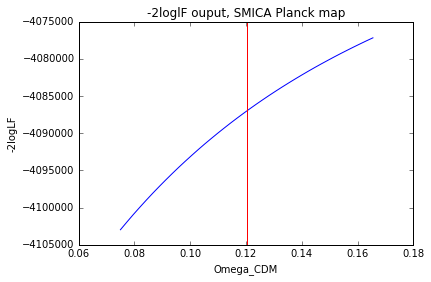

In [95]:
plt.plot(forty_samples, logLF_40)
plt.title("-2loglF ouput, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

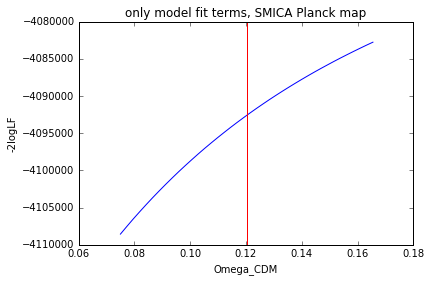

In [96]:
plt.plot(forty_samples, modelfit_terms)
plt.title("only model fit terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

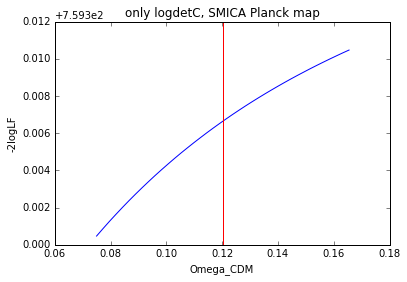

In [97]:
plt.plot(forty_samples, logdet_terms)
plt.title("only logdetC, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

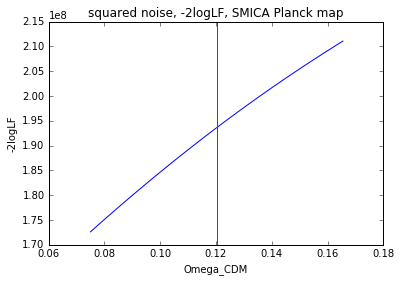

In [98]:
plt.plot(forty_samples, sqlogLF_40)
plt.title("squared noise, -2logLF, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

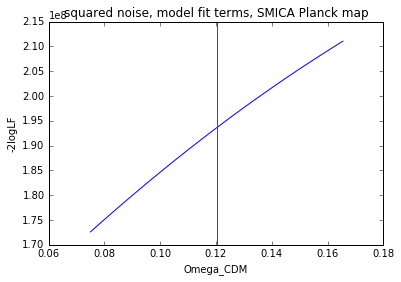

In [94]:
plt.plot(forty_samples, sqmodelfit_terms)
plt.title("squared noise, model fit terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

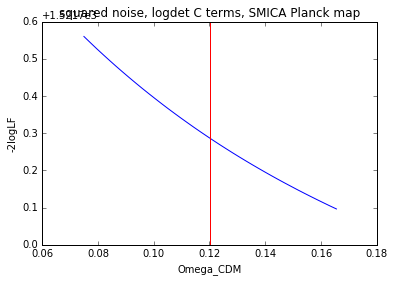

In [93]:
plt.plot(forty_samples, sqlogdet_terms)
plt.title("squared noise, logdet C terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

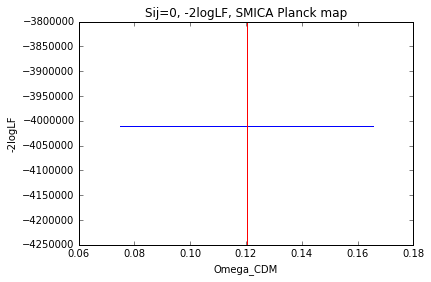

In [92]:
plt.plot(forty_samples, onlynoise_logLF)
plt.title("Sij=0, -2logLF, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

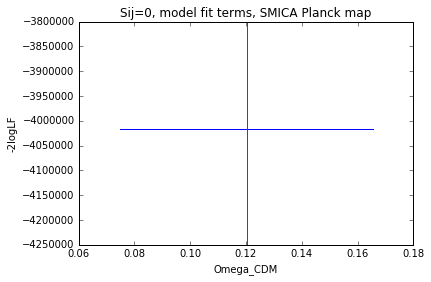

In [91]:
plt.plot(forty_samples, onlynoise_modelfits)
plt.title("Sij=0, model fit terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

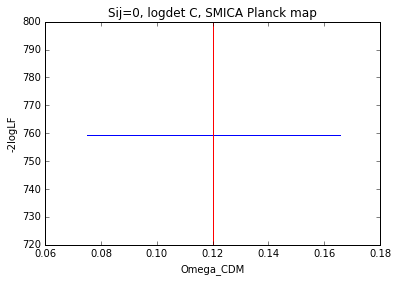

In [90]:
plt.plot(forty_samples, onlynoise_logdet)
plt.title("Sij=0, logdet C, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

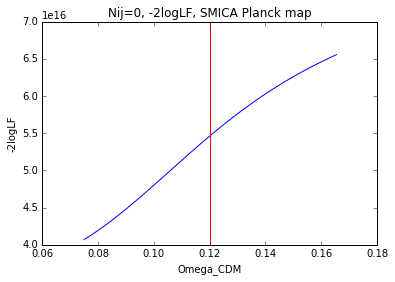

In [89]:
plt.plot(forty_samples, noise_logLF)
plt.title("Nij=0, -2logLF, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

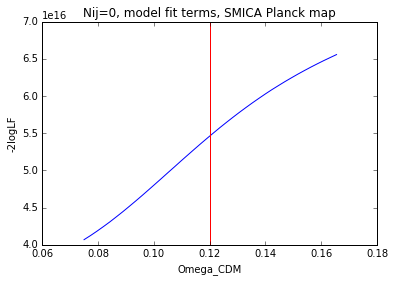

In [88]:
plt.plot(forty_samples, noise_modelfits)
plt.title("Nij=0, model fit terms, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

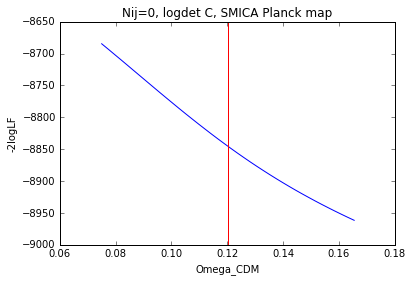

In [87]:
plt.plot(forty_samples, noise_logdet)
plt.title("Nij=0, logdet C, SMICA Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.12029, color = 'r')

In [86]:
forty_samples

array([ 0.075     ,  0.07732051,  0.07964103,  0.08196154,  0.08428205,
        0.08660256,  0.08892308,  0.09124359,  0.0935641 ,  0.09588462,
        0.09820513,  0.10052564,  0.10284615,  0.10516667,  0.10748718,
        0.10980769,  0.11212821,  0.11444872,  0.11676923,  0.11908974,
        0.12141026,  0.12373077,  0.12605128,  0.12837179,  0.13069231,
        0.13301282,  0.13533333,  0.13765385,  0.13997436,  0.14229487,
        0.14461538,  0.1469359 ,  0.14925641,  0.15157692,  0.15389744,
        0.15621795,  0.15853846,  0.16085897,  0.16317949,  0.1655    ])